<a href="https://colab.research.google.com/github/sultanbst123/Kaggle_NCAA-March-Machine-Learning-Mania-2022/blob/main/(NCAA)March_Machine_Learning_Mania_2022_Women%E2%80%99s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>(NCAA)March Machine Learning Mania 2022 - Women’s</h1>

## Library and File

In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:

import numpy as np
import pandas as pd 

import os 
import re
import gdown
from zipfile import ZipFile

import seaborn as sns 
import matplotlib.pyplot as plt 

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# untuk outlier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import log_loss # evaluation 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
with ZipFile("/content/drive/MyDrive/March Machine Learning Mania 2022-man/womens-march-mania-2022.zip", "r") as zipobj:
     zipobj.extractall("NCAA file")

In [ ]:

# check semua file
os.listdir("/content/NCAA file/WDataFiles_Stage1")

['WGameCities.csv',
 'Cities.csv',
 'Conferences.csv',
 'WNCAATourneyCompactResults.csv',
 'WTeams.csv',
 'WRegularSeasonCompactResults.csv',
 'WRegularSeasonDetailedResults.csv',
 'WNCAATourneySlots.csv',
 'WNCAATourneyDetailedResults.csv',
 'WSeasons.csv',
 'WTeamConferences.csv',
 'WSampleSubmissionStage1.csv',
 'WNCAATourneySeeds.csv',
 'WTeamSpellings.csv']

In [ ]:
# lihat semua data

## Data section 1

### WTeams

In [ ]:
WTeams = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WTeams.csv")

In [ ]:
WTeams.sample(7)

,TeamID,TeamName
260,3362,San Francisco
47,3148,Central Conn
21,3122,Austin Peay
203,3305,Nevada
99,3201,Fresno St
291,3393,Syracuse
63,3165,Cornell


In [ ]:
WTeams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TeamID    370 non-null    int64 
 1   TeamName  370 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [ ]:
WTeams.describe(include="all")

,TeamID,TeamName
count,370.000000,370
unique,NaN,370
top,NaN,Abilene Chr
freq,NaN,1
mean,3286.443243,NaN
std,107.304411,NaN
min,3101.000000,NaN
25%,3194.250000,NaN
50%,3286.500000,NaN
75%,3378.750000,NaN


In [ ]:
# check nilai jumlah nilai 
WTeams.nunique()

TeamID      370
TeamName    370
dtype: int64

###WSeasons

In [ ]:
WSeasons = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WSeasons.csv")

In [ ]:
WSeasons.sample(7)

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
16,2014,2013-11-04 00:00:00,Lincoln,Stanford,Louisville,NotreDame
23,2021,2020-11-02 00:00:00,Alamo,Hemisfair,Mercado,RiverWalk
1,1999,1998-10-26 00:00:00,East,Mideast,Midwest,West
20,2018,2017-10-30 00:00:00,Albany,Spokane,KansasCity,Lexington
3,2001,2000-10-30 00:00:00,East,Midwest,Mideast,West
13,2011,2010-11-01 00:00:00,Dallas,Spokane,Dayton,Philadelphia
18,2016,2015-11-02 00:00:00,Bridgeport,Dallas,Lexington,SiouxFalls


In [ ]:
WSeasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   25 non-null     int64 
 1   DayZero  25 non-null     object
 2   RegionW  25 non-null     object
 3   RegionX  25 non-null     object
 4   RegionY  25 non-null     object
 5   RegionZ  25 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [ ]:
WSeasons.describe(include="all")

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
count,25.000000,25,25,25,25,25
unique,NaN,25,14,18,15,17
top,NaN,1997-10-27 00:00:00,East,Spokane,Mideast,West
freq,NaN,1,7,4,5,5
mean,2010.000000,NaN,NaN,NaN,NaN,NaN
std,7.359801,NaN,NaN,NaN,NaN,NaN
min,1998.000000,NaN,NaN,NaN,NaN,NaN
25%,2004.000000,NaN,NaN,NaN,NaN,NaN
50%,2010.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN


###WNCAATourneySeeds

In [ ]:
WNCAATourneySeeds = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WNCAATourneySeeds.csv")

In [ ]:
WNCAATourneySeeds.sample(7)

,Season,Seed,TeamID
431,2004,Y16,3159
1441,2021,Y02,3401
176,2000,Z01,3208
1356,2019,W13,3129
538,2006,X11,3395
1273,2017,Z10,3405
593,2007,X02,3268


In [ ]:
WNCAATourneySeeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  1472 non-null   int64 
 1   Seed    1472 non-null   object
 2   TeamID  1472 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.6+ KB


In [ ]:
WNCAATourneySeeds.describe(include="all")

,Season,Seed,TeamID
count,1472.000000,1472,1472.000000
unique,NaN,64,NaN
top,NaN,W01,NaN
freq,NaN,23,NaN
mean,2009.043478,NaN,3287.491168
std,6.710343,NaN,100.472811
min,1998.000000,NaN,3101.000000
25%,2003.000000,NaN,3204.500000
50%,2009.000000,NaN,3283.000000
75%,2015.000000,NaN,3377.250000


###WRegularSeasonCompactResults

In [ ]:
WRegularSeasonCompactResults = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WRegularSeasonCompactResults.csv")

In [ ]:
WRegularSeasonCompactResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
75271,2013,119,3136,61,3352,56,H,1
42304,2007,71,3157,71,3366,51,H,0
83595,2015,74,3284,73,3264,69,A,0
73736,2013,85,3207,54,3153,52,H,0
36321,2006,41,3318,52,3306,47,H,0
89270,2016,84,3299,84,3175,64,A,0
1068,1998,54,3231,68,3460,46,H,0


In [ ]:
WRegularSeasonCompactResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119277 entries, 0 to 119276
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   119277 non-null  int64 
 1   DayNum   119277 non-null  int64 
 2   WTeamID  119277 non-null  int64 
 3   WScore   119277 non-null  int64 
 4   LTeamID  119277 non-null  int64 
 5   LScore   119277 non-null  int64 
 6   WLoc     119277 non-null  object
 7   NumOT    119277 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 7.3+ MB


In [ ]:
WRegularSeasonCompactResults.describe(include="all")

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
count,119277.000000,119277.000000,119277.000000,119277.000000,119277.000000,119277.000000,119277,119277.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,H,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,67871,NaN
mean,2010.197129,71.022703,3284.499434,71.855261,3284.552579,57.518264,NaN,0.038071
std,6.939232,34.958137,103.796198,11.347675,105.024170,10.801784,NaN,0.223613
min,1998.000000,1.000000,3101.000000,30.000000,3101.000000,11.000000,NaN,0.000000
25%,2004.000000,40.000000,3196.000000,64.000000,3193.000000,50.000000,NaN,0.000000
50%,2010.000000,74.000000,3282.000000,71.000000,3284.000000,57.000000,NaN,0.000000
75%,2016.000000,101.000000,3376.000000,79.000000,3375.000000,64.000000,NaN,0.000000


###WNCAATourneyCompactResults

In [ ]:
WNCAATourneyCompactResults = pd.read_csv("/content/NCAA file/MDataFiles_Stage1/MNCAATourneyCompactResults.csv")

In [ ]:
WNCAATourneyCompactResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1336,2006,136,1231,87,1361,83,N,0
112,1986,143,1246,68,1104,63,N,0
261,1989,136,1278,86,1243,75,N,0
2006,2016,137,1292,90,1277,81,N,0
2265,2021,137,1353,60,1155,56,N,0
675,1995,139,1314,73,1235,51,N,0
1459,2008,136,1243,80,1425,67,N,0


In [ ]:
WNCAATourneyCompactResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2317 non-null   int64 
 1   DayNum   2317 non-null   int64 
 2   WTeamID  2317 non-null   int64 
 3   WScore   2317 non-null   int64 
 4   LTeamID  2317 non-null   int64 
 5   LScore   2317 non-null   int64 
 6   WLoc     2317 non-null   object
 7   NumOT    2317 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 144.9+ KB


In [ ]:
WNCAATourneyCompactResults.describe(include="all")

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
count,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317,2317.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2317,NaN
mean,2002.758308,139.167890,1286.536901,76.891239,1292.018127,65.168321,NaN,0.069055
std,10.471044,4.217412,100.988726,11.836804,103.292844,11.064350,NaN,0.282592
min,1985.000000,134.000000,1101.000000,43.000000,1101.000000,29.000000,NaN,0.000000
25%,1994.000000,136.000000,1210.000000,69.000000,1209.000000,58.000000,NaN,0.000000
50%,2003.000000,137.000000,1276.000000,76.000000,1290.000000,65.000000,NaN,0.000000
75%,2012.000000,139.000000,1385.000000,84.000000,1387.000000,72.000000,NaN,0.000000


###WSampleSubmissionStage1

In [ ]:
WSampleSubmissionStage1 = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WSampleSubmissionStage1.csv")

In [ ]:
WSampleSubmissionStage1.sample(7)

,ID,Pred
7077,2019_3200_3235,0.5
8006,2019_3377_3416,0.5
9911,2021_3378_3393,0.5
6544,2019_3137_3268,0.5
1865,2016_3355_3376,0.5
6656,2019_3140_3280,0.5
7001,2019_3195_3283,0.5


In [ ]:
WSampleSubmissionStage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10080 non-null  object 
 1   Pred    10080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.6+ KB


## Data section 2

###WRegularSeasonDetailedResults

In [ ]:
WRegularSeasonDetailedResults = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WRegularSeasonDetailedResults.csv")

In [ ]:
WRegularSeasonDetailedResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
7338,2011,68,3185,70,3123,62,H,0,28,59,...,23,6,9,16,24,18,27,7,3,18
57991,2021,67,3390,70,3332,63,N,0,26,60,...,19,4,7,12,21,9,15,12,1,18
34881,2016,107,3127,66,3436,52,H,0,22,57,...,28,4,7,19,22,12,15,6,6,18
59462,2021,108,3225,86,3340,63,H,0,32,76,...,21,11,15,11,23,12,14,7,4,17
27269,2015,48,3433,64,3410,43,H,0,25,61,...,17,10,15,6,27,8,16,2,5,23
48010,2019,44,3347,54,3433,49,A,0,16,59,...,7,18,22,7,33,7,19,5,1,24
20000,2013,122,3301,56,3155,45,H,0,17,49,...,14,6,7,16,23,5,16,8,6,18


In [ ]:
WRegularSeasonDetailedResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63887 entries, 0 to 63886
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   63887 non-null  int64 
 1   DayNum   63887 non-null  int64 
 2   WTeamID  63887 non-null  int64 
 3   WScore   63887 non-null  int64 
 4   LTeamID  63887 non-null  int64 
 5   LScore   63887 non-null  int64 
 6   WLoc     63887 non-null  object
 7   NumOT    63887 non-null  int64 
 8   WFGM     63887 non-null  int64 
 9   WFGA     63887 non-null  int64 
 10  WFGM3    63887 non-null  int64 
 11  WFGA3    63887 non-null  int64 
 12  WFTM     63887 non-null  int64 
 13  WFTA     63887 non-null  int64 
 14  WOR      63887 non-null  int64 
 15  WDR      63887 non-null  int64 
 16  WAst     63887 non-null  int64 
 17  WTO      63887 non-null  int64 
 18  WStl     63887 non-null  int64 
 19  WBlk     63887 non-null  int64 
 20  WPF      63887 non-null  int64 
 21  LFGM     63887 non-null  int64 
 22

In [ ]:
WRegularSeasonDetailedResults.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,...,63887.00000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000,63887.000000
mean,2015.751170,69.296226,3284.102431,71.529216,3285.374849,57.176483,0.051654,25.743046,58.979699,6.157231,...,17.66422,10.570601,15.685429,12.039773,22.856810,10.954153,17.418223,7.155165,2.858923,18.190696
std,3.604191,35.779537,103.546473,11.531797,104.491226,11.010445,0.259302,4.982479,8.025777,3.103510,...,6.46295,4.960681,6.676534,4.597124,4.917324,3.804744,5.300155,3.207817,2.084995,4.730279
min,2010.000000,1.000000,3101.000000,30.000000,3101.000000,11.000000,0.000000,9.000000,30.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2013.000000,37.000000,3195.000000,64.000000,3194.000000,50.000000,0.000000,22.000000,53.000000,4.000000,...,13.00000,7.000000,11.000000,9.000000,19.000000,8.000000,14.000000,5.000000,1.000000,15.000000
50%,2016.000000,73.000000,3282.000000,71.000000,3285.000000,57.000000,0.000000,25.000000,59.000000,6.000000,...,17.00000,10.000000,15.000000,12.000000,23.000000,11.000000,17.000000,7.000000,3.000000,18.000000
75%,2019.000000,100.000000,3376.000000,79.000000,3374.000000,64.000000,0.000000,29.000000,64.000000,8.000000,...,22.00000,14.000000,20.000000,15.000000,26.000000,13.000000,21.000000,9.000000,4.000000,21.000000
max,2022.000000,132.000000,3472.000000,140.000000,3472.000000,130.000000,5.000000,58.000000,113.000000,25.000000,...,80.00000,37.000000,52.000000,38.000000,53.000000,34.000000,49.000000,26.000000,17.000000,47.000000


###WNCAATourneyDetailedResults

In [ ]:
WNCAATourneyDetailedResults = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WNCAATourneyDetailedResults.csv")

In [ ]:
WNCAATourneyDetailedResults.sample(7)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
34,2010,140,3199,66,3385,65,H,1,25,58,...,4,17,24,18,18,11,16,7,2,14
482,2017,140,3163,94,3393,64,H,0,33,53,...,20,4,5,9,16,8,9,5,0,15
278,2014,139,3336,62,3455,56,H,0,26,59,...,23,13,14,7,22,10,8,3,2,20
479,2017,139,3376,71,3113,68,H,0,22,50,...,11,15,20,14,22,14,15,8,0,23
575,2019,137,3266,58,3349,54,N,1,23,68,...,11,4,6,9,29,18,19,8,6,13
424,2016,140,3417,72,3378,67,H,0,27,69,...,18,15,17,16,26,7,14,6,1,18
486,2017,140,3390,69,3243,48,A,0,26,57,...,15,6,11,5,20,12,15,3,1,10


In [ ]:
WNCAATourneyDetailedResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   693 non-null    int64 
 1   DayNum   693 non-null    int64 
 2   WTeamID  693 non-null    int64 
 3   WScore   693 non-null    int64 
 4   LTeamID  693 non-null    int64 
 5   LScore   693 non-null    int64 
 6   WLoc     693 non-null    object
 7   NumOT    693 non-null    int64 
 8   WFGM     693 non-null    int64 
 9   WFGA     693 non-null    int64 
 10  WFGM3    693 non-null    int64 
 11  WFGA3    693 non-null    int64 
 12  WFTM     693 non-null    int64 
 13  WFTA     693 non-null    int64 
 14  WOR      693 non-null    int64 
 15  WDR      693 non-null    int64 
 16  WAst     693 non-null    int64 
 17  WTO      693 non-null    int64 
 18  WStl     693 non-null    int64 
 19  WBlk     693 non-null    int64 
 20  WPF      693 non-null    int64 
 21  LFGM     693 non-null    int64 
 22  LF

In [ ]:
WNCAATourneyDetailedResults.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,...,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,2015.090909,140.792208,3280.538240,76.520924,3284.515152,59.431457,0.036075,27.966811,60.025974,6.020202,...,19.129870,9.867244,13.929293,12.121212,21.487734,11.451659,14.694084,6.663781,2.981241,17.733045
std,3.317773,4.025942,97.703029,11.746906,99.263102,11.485099,0.194201,5.230004,7.524481,3.173617,...,7.079678,5.050580,6.562014,4.786152,4.740239,3.815020,4.763351,3.111293,2.044574,4.243256
min,2010.000000,137.000000,3104.000000,48.000000,3101.000000,26.000000,0.000000,16.000000,40.000000,0.000000,...,3.000000,0.000000,0.000000,1.000000,8.000000,2.000000,2.000000,0.000000,0.000000,3.000000
25%,2012.000000,138.000000,3195.000000,69.000000,3205.000000,52.000000,0.000000,24.000000,55.000000,4.000000,...,14.000000,6.000000,9.000000,9.000000,18.000000,9.000000,11.000000,4.000000,1.000000,15.000000
50%,2015.000000,139.000000,3280.000000,75.000000,3280.000000,60.000000,0.000000,27.000000,59.000000,6.000000,...,18.000000,9.000000,13.000000,12.000000,22.000000,11.000000,14.000000,6.000000,3.000000,18.000000
75%,2018.000000,141.000000,3376.000000,84.000000,3376.000000,67.000000,0.000000,31.000000,65.000000,8.000000,...,23.000000,13.000000,18.000000,15.000000,24.000000,14.000000,18.000000,8.000000,4.000000,20.000000
max,2021.000000,155.000000,3462.000000,140.000000,3462.000000,100.000000,2.000000,59.000000,91.000000,18.000000,...,57.000000,26.000000,38.000000,29.000000,35.000000,29.000000,32.000000,22.000000,11.000000,31.000000


## Data section 3

###Cities

In [ ]:
Cities = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/Cities.csv")

In [ ]:
Cities.sample(7)

,CityID,City,State
344,4346,Toledo,OH
453,4476,Saint George,UT
460,4483,Canyon,TX
224,4225,Moscow,ID
363,4365,West Lafayette,IN
290,4291,Richmond,KY
403,4426,Cupertino,CA


In [ ]:
Cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CityID  463 non-null    int64 
 1   City    463 non-null    object
 2   State   463 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.0+ KB


In [ ]:
Cities.describe(include="all")

,CityID,City,State
count,463.00000,463,463
unique,NaN,435,63
top,NaN,Springfield,NY
freq,NaN,4,31
mean,4236.00432,NaN,NaN
std,139.54096,NaN,NaN
min,4001.00000,NaN,NaN
25%,4116.50000,NaN,NaN
50%,4232.00000,NaN,NaN
75%,4348.50000,NaN,NaN


###WGameCities

In [ ]:
WGameCities = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WGameCities.csv")

In [ ]:
WGameCities.sample(7)

,Season,DayNum,WTeamID,LTeamID,CRType,CityID
56392,2020,108,3280,3120,Regular,4018
6372,2011,37,3328,3372,Regular,4247
8671,2011,96,3229,3232,Regular,4246
57321,2021,23,3122,3466,Regular,4444
1203,2010,35,3355,3237,Regular,4161
22185,2014,46,3326,3111,Regular,4080
41130,2017,121,3241,3158,Regular,4148


In [ ]:
WGameCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64473 entries, 0 to 64472
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   64473 non-null  int64 
 1   DayNum   64473 non-null  int64 
 2   WTeamID  64473 non-null  int64 
 3   LTeamID  64473 non-null  int64 
 4   CRType   64473 non-null  object
 5   CityID   64473 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.0+ MB


## Data section 4

###WTeamSpellings

In [ ]:
WTeamSpellings = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WTeamSpellings.csv", encoding='cp1252')

In [ ]:
WTeamSpellings.sample(7)

,TeamNameSpelling,TeamID
543,montana,3285
399,kansas st,3243
310,george-mason,3206
1050,utah st,3429
251,eastern washington,3186
733,pitt,3338
1111,western-ky,3443


In [ ]:
WTeamSpellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TeamNameSpelling  1150 non-null   object
 1   TeamID            1150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.1+ KB


In [ ]:
WTeamSpellings.describe(include="all")

,TeamNameSpelling,TeamID
count,1150,1150.000000
unique,1150,NaN
top,a&m-corpus chris,NaN
freq,1,NaN
mean,NaN,3291.174783
std,NaN,105.210254
min,NaN,3101.000000
25%,NaN,3199.000000
50%,NaN,3293.500000
75%,NaN,3383.000000


###WNCAATourneySlots

In [ ]:
WNCAATourneySlots = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WNCAATourneySlots.csv")

In [ ]:
WNCAATourneySlots.sample(7)

,Slot,StrongSeed,WeakSeed
36,R2X1,R1X1,R1X8
62,R6CH,R5WX,R5YZ
11,R1X4,X04,X13
57,R4X1,R3X1,R3X2
19,R1Y4,Y04,Y13
16,R1Y1,Y01,Y16
47,R2Z4,R1Z4,R1Z5


In [ ]:
WNCAATourneySlots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Slot        63 non-null     object
 1   StrongSeed  63 non-null     object
 2   WeakSeed    63 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


###Conferences

In [ ]:
Conferences = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/Conferences.csv")

In [ ]:
Conferences.sample(7)

,ConfAbbrev,Description
34,mwc,Mountain West Conference
41,pcaa,Pacific Coast Athletic Association
48,swc,Southwest Conference
11,big_ten,Big Ten Conference
1,a_ten,Atlantic 10 Conference
24,ind,Independent
47,swac,Southwest Athletic Conference


In [ ]:
Conferences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ConfAbbrev   51 non-null     object
 1   Description  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


###WTeamConferences

In [ ]:
WTeamConferences = pd.read_csv("/content/NCAA file/WDataFiles_Stage1/WTeamConferences.csv")

In [ ]:
WTeamConferences.sample(7)

,Season,TeamID,ConfAbbrev
2265,2005,3165,ivy
1883,2003,3463,ivy
5709,2015,3209,sun_belt
4492,2011,3381,summit
6379,2017,3181,acc
7822,2021,3231,big_ten
5128,2013,3330,caa


In [ ]:
WTeamConferences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407 entries, 0 to 8406
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      8407 non-null   int64 
 1   TeamID      8407 non-null   int64 
 2   ConfAbbrev  8407 non-null   object
dtypes: int64(2), object(1)
memory usage: 197.2+ KB


## ambil file data penting saja

In [ ]:
season_data = pd.read_csv('/content/NCAA file/WDataFiles_Stage1/WRegularSeasonCompactResults.csv')
seeds = pd.read_csv('/content/NCAA file/WDataFiles_Stage1/WNCAATourneySeeds.csv')

In [ ]:
def score_gap(df):
    df['ScoreGap'] = df['WScore'] - df['LScore']
    return df

In [ ]:
season_data = score_gap(season_data)

In [ ]:
# Creates an empty list of all the teams, Winners + Lossers to merge data back....
def create_team_list(df, group_list = ['Season', 'WTeamID'], team_id = 'WTeamID'):
    group = df.groupby(group_list).count().reset_index()
    group = group[group_list].rename(columns={team_id: "TeamID"})
    return group

In [ ]:
winners = create_team_list(season_data, group_list = ['Season', 'WTeamID'], team_id = 'WTeamID')
lossers = create_team_list(season_data, group_list = ['Season', 'LTeamID'], team_id = 'LTeamID')

# Create an empty train dataset.
team_agg_features = pd.concat([winners, lossers], axis = 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop = True)

In [ ]:


# Creating aggregated features for win
def winner_aggregated_features(df, group_list = ['Season', 'WTeamID']):
    tmp = df.groupby(group_list).agg(NumWins       = ('WTeamID', 'count'), 
                                     AvgWinsGap    = ('ScoreGap', 'mean'),
                                     W_TotalPoints = ('WScore', 'sum'),
                                     W_MaxPoints   = ('WScore', 'max'),
                                     W_MinPoints   = ('WScore', 'min'),
                                    )
    tmp = tmp.reset_index()
    tmp = tmp.rename(columns={"WTeamID": "TeamID"})
    
    return tmp

In [ ]:
# Creating aggregated features for loss
def losser_aggregated_features(df, group_list = ['Season', 'LTeamID']):
    tmp = df.groupby(group_list).agg(NumLosses       = ('LTeamID', 'count'), 
                                     AvgLossesGap    = ('ScoreGap', 'mean'),
                                     L_TotalPoints = ('LScore', 'sum'),
                                     L_MaxPoints   = ('LScore', 'max'),
                                     L_MinPoints   = ('LScore', 'min'),
                                    )
    tmp = tmp.reset_index()
    tmp = tmp.rename(columns={"LTeamID": "TeamID"})
    return tmp

In [ ]:
winner_team_aggregation = winner_aggregated_features(season_data)
losser_team_aggregation = losser_aggregated_features(season_data)

In [ ]:
def merge_back(df):
    df = df.merge(winner_team_aggregation, on = ['Season', 'TeamID'], how = 'left')
    df = df.merge(losser_team_aggregation, on = ['Season', 'TeamID'], how = 'left')
    df.fillna(0, inplace = True) 
    return df

In [ ]:

# gabungkan loss dan win 

team_agg_features = merge_back(team_agg_features)

In [ ]:
team_agg_features

,Season,TeamID,NumWins,AvgWinsGap,W_TotalPoints,W_MaxPoints,W_MinPoints,NumLosses,AvgLossesGap,L_TotalPoints,L_MaxPoints,L_MinPoints
0,1998,3102,4.0,15.500000,263.0,81.0,59.0,20.0,27.850000,1112.0,74.0,39.0
1,1998,3103,11.0,15.000000,842.0,89.0,64.0,18.0,18.611111,1166.0,91.0,47.0
2,1998,3104,21.0,21.619048,1657.0,104.0,62.0,9.0,5.666667,640.0,90.0,58.0
3,1998,3106,6.0,8.333333,421.0,80.0,58.0,15.0,14.466667,865.0,73.0,36.0
4,1998,3108,12.0,17.750000,898.0,84.0,66.0,11.0,16.636364,662.0,75.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,2022,3468,1.0,7.000000,68.0,68.0,68.0,18.0,19.944444,1014.0,83.0,25.0
8401,2022,3469,3.0,8.666667,214.0,82.0,57.0,14.0,20.000000,809.0,72.0,35.0
8402,2022,3470,8.0,5.750000,475.0,69.0,51.0,10.0,15.300000,492.0,69.0,33.0
8403,2022,3471,8.0,10.625000,539.0,82.0,59.0,10.0,12.700000,511.0,73.0,44.0


In [ ]:
def calculate_features(df):
    
    df['WinRatio'] = df['NumWins'] / (df['NumWins'] + df['NumLosses'])
    df['AvgScoreGap'] = ((df['NumWins'] * df['AvgWinsGap'] - df['NumLosses'] * df['AvgLossesGap']) / (df['NumWins'] + df['NumLosses']))
    df['PointsRatio'] = df['W_TotalPoints'] / (df['L_TotalPoints'] + df['W_TotalPoints'])
    return df

team_agg_features = calculate_features(team_agg_features)

In [ ]:

# hanya fitur yang sudah di rekayasa saja

team_agg_features = team_agg_features[['Season','TeamID','WinRatio', 'AvgScoreGap','PointsRatio']]

In [ ]:
team_agg_features.head()

,Season,TeamID,WinRatio,AvgScoreGap,PointsRatio
0,1998,3102,0.166667,-20.625000,0.191273
1,1998,3103,0.379310,-5.862069,0.419323
2,1998,3104,0.700000,13.433333,0.721376
3,1998,3106,0.285714,-7.952381,0.327372
4,1998,3108,0.521739,1.304348,0.575641


In [ ]:
tournament_data = pd.read_csv('/content/NCAA file/WDataFiles_Stage1/WNCAATourneyCompactResults.csv')
tournament_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


In [ ]:

# ganti nama fitur 

tournament_data = tournament_data.rename(columns = {'WTeamID' : 'W_TeamID', 'LTeamID' : 'L_TeamID', 'WScore' : 'W_Score', 'LScore' : 'L_Score'})

In [ ]:

# hapus fitur

tournament_data.drop(['NumOT', 'WLoc'], axis = 1, inplace = True)

In [ ]:
tournament_data.head()

,Season,DayNum,W_TeamID,W_Score,L_TeamID,L_Score
0,1998,137,3104,94,3422,46
1,1998,137,3112,75,3365,63
2,1998,137,3163,93,3193,52
3,1998,137,3198,59,3266,45
4,1998,137,3203,74,3208,72


In [ ]:
tournament_data.Season.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2021])

In [ ]:
# filter berdasarkan season nya jika mau

In [ ]:
MIN_SEASON = 2016
# Remove data before 2003(TERSERAH), no all the data is available...
tournament_data = tournament_data[tournament_data['Season'] >= MIN_SEASON].reset_index(drop = True)

In [ ]:
tournament_data.Season.unique() # new

array([2016, 2017, 2018, 2019, 2021])

In [ ]:
def merge_seed(df, seed_df, left_on = ['Season', 'W_TeamID'], field_name = 'SeedW'):
    df = pd.merge(df,seed_df, how = 'left', left_on = left_on, right_on = ['Season', 'TeamID'])
    df = df.drop('TeamID', axis = 1).rename(columns = {'Seed': field_name})
    return df

In [ ]:
tournament_data = merge_seed(tournament_data, seeds, left_on = ['Season', 'W_TeamID'], field_name = 'W_Seed')
tournament_data = merge_seed(tournament_data, seeds, left_on = ['Season', 'L_TeamID'], field_name = 'L_Seed')

In [ ]:

# hapus huruf saja 

def seed_number(row):
    return int(re.sub("[^0-9]", "", row))

tournament_data['W_Seed'] = tournament_data['W_Seed'].apply(seed_number)
tournament_data['L_Seed'] = tournament_data['L_Seed'].apply(seed_number)

In [ ]:
def merge_agg_features(df, agg_features):
    for result in ['W', 'L']:
        df = pd.merge(df, agg_features, how = 'left', left_on = ['Season', result +'_'+ 'TeamID'], right_on = ['Season', 'TeamID'])
        avoid = ['Season', 'TeamID']
        new_names = {col: result +'_'+ col for col in agg_features.columns if col not in avoid}
        df = df.rename(columns = new_names)        
        df = df.drop(columns = 'TeamID', axis = 1)
    return df

In [ ]:
tournament_data = merge_agg_features(tournament_data, team_agg_features)

In [ ]:
def replace_win_loser(df):
    team_a = df.copy()
    team_b = df.copy()
    
    team_a_dict, team_b_dict = {}, {}
    
    for col in team_a.columns:
        if col.find('W_') == 0:
            new_col_name = str(col).replace('W_', 'A_')
            team_a_dict[col] = new_col_name
        if col.find('L_') == 0:
            new_col_name = col.replace('L_', 'B_')    
            team_a_dict[col] = new_col_name
            
    for col in team_b.columns:
        if col.find('W_') == 0:
            new_col_name = str(col).replace('W_', 'B_')
            team_b_dict[col] = new_col_name
        if col.find('L_') == 0:
            new_col_name = col.replace('L_', 'A_')
            team_b_dict[col] = new_col_name

    team_a = team_a.rename(columns = team_a_dict)
    team_b = team_b.rename(columns = team_b_dict)
    
    merged_df = pd.concat([team_a, team_b], axis = 0, sort = False)
    return merged_df

In [ ]:
tournament_data = replace_win_loser(tournament_data)

In [ ]:
def calculate_differences(df):
    
    df['SeedDiff'] = df['A_Seed'] - df['B_Seed']
    df['WinRatioDiff'] = df['A_WinRatio'] - df['B_WinRatio']
    df['GapAvgDiff'] = df['A_AvgScoreGap'] - df['B_AvgScoreGap']    
    df['PointsRatioDiff'] = df['A_PointsRatio'] - df['A_PointsRatio']
    return df

In [ ]:
tournament_data = calculate_differences(tournament_data)

In [ ]:
#buat target fitur

In [ ]:
tournament_data['ScoreDiff'] = tournament_data['A_Score'] - tournament_data['B_Score']
tournament_data['A_Win'] = (tournament_data['ScoreDiff'] > 0).astype(int)
tournament_data = tournament_data.drop(columns=['A_Score', 'B_Score'])

In [ ]:
tournament_data.head()

,Season,DayNum,A_TeamID,B_TeamID,A_Seed,B_Seed,A_WinRatio,A_AvgScoreGap,A_PointsRatio,B_WinRatio,B_AvgScoreGap,B_PointsRatio,SeedDiff,WinRatioDiff,GapAvgDiff,PointsRatioDiff,ScoreDiff,A_Win
0,2016,137,3107,3196,12,5,0.870968,18.677419,0.892371,0.733333,8.700000,0.766239,7,0.137634,9.977419,0.0,2,1
1,2016,137,3113,3308,2,15,0.806452,9.258065,0.828093,0.857143,8.964286,0.881409,-13,-0.050691,0.293779,0.0,22,1
2,2016,137,3120,3385,9,8,0.612903,3.032258,0.689315,0.718750,6.812500,0.748601,1,-0.105847,-3.780242,0.0,11,1
3,2016,137,3124,3225,1,16,0.970588,24.617647,0.982974,0.709677,10.612903,0.758355,-15,0.260911,14.004744,0.0,30,1
4,2016,137,3177,3241,6,11,0.757576,16.272727,0.780689,0.843750,15.406250,0.869546,-5,-0.086174,0.866477,0.0,30,1


In [ ]:
# buat test dataset

In [ ]:
sub_stage_one = pd.read_csv('/content/NCAA file/WDataFiles_Stage1/WSampleSubmissionStage1.csv') 
tst_data = sub_stage_one.copy()

In [ ]:
def separate_id(df):
    
    df['Season']  = df['ID'].apply(lambda x: int(x.split('_')[0]))
    df['TeamIdA'] = df['ID'].apply(lambda x: int(x.split('_')[1]))
    df['TeamIdB'] = df['ID'].apply(lambda x: int(x.split('_')[2]))
    return df

In [ ]:
tst_data = separate_id(tst_data)

In [ ]:
tst_data = merge_seed(tst_data, seeds, left_on = ['Season', 'TeamIdA'], field_name = 'A_Seed')
tst_data = merge_seed(tst_data, seeds, left_on = ['Season', 'TeamIdB'], field_name = 'B_Seed')

In [ ]:
tst_data['A_Seed'] = tst_data['A_Seed'].apply(seed_number)
tst_data['B_Seed'] = tst_data['B_Seed'].apply(seed_number)

In [ ]:
tst_data = tst_data.rename(columns = {'TeamIdA': 'A_TeamID', 'TeamIdB': 'B_TeamID'})

In [ ]:
def merge_agg_features(df, agg_features):
    for result in ['A', 'B']:
        df = pd.merge(df, agg_features, how = 'left', left_on = ['Season', result +'_'+ 'TeamID'], right_on = ['Season', 'TeamID'])
        avoid = ['Season', 'TeamID']
        new_names = {col: result +'_'+ col for col in agg_features.columns if col not in avoid}
        df = df.rename(columns = new_names)        
        df = df.drop(columns = 'TeamID', axis = 1)
    return df

In [ ]:
tst_data = merge_agg_features(tst_data, team_agg_features)

In [ ]:
tst_data = calculate_differences(tst_data)

In [ ]:
tst_data

,ID,Pred,Season,A_TeamID,B_TeamID,A_Seed,B_Seed,A_WinRatio,A_AvgScoreGap,A_PointsRatio,B_WinRatio,B_AvgScoreGap,B_PointsRatio,SeedDiff,WinRatioDiff,GapAvgDiff,PointsRatioDiff
0,2016_3106_3107,0.5,2016,3106,3107,15,12,0.620690,4.000000,0.672480,0.870968,18.677419,0.892371,3,-0.250278,-14.677419,0.0
1,2016_3106_3113,0.5,2016,3106,3113,15,2,0.620690,4.000000,0.672480,0.806452,9.258065,0.828093,13,-0.185762,-5.258065,0.0
2,2016_3106_3119,0.5,2016,3106,3119,15,13,0.620690,4.000000,0.672480,0.933333,20.066667,0.938301,2,-0.312644,-16.066667,0.0
3,2016_3106_3120,0.5,2016,3106,3120,15,9,0.620690,4.000000,0.672480,0.612903,3.032258,0.689315,6,0.007786,0.967742,0.0
4,2016_3106_3124,0.5,2016,3106,3124,15,1,0.620690,4.000000,0.672480,0.970588,24.617647,0.982974,14,-0.349899,-20.617647,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2021_3450_3460,0.5,2021,3450,3460,9,13,0.521739,-0.043478,0.562842,0.720000,8.200000,0.738994,-4,-0.198261,-8.243478,0.0
10076,2021_3450_3461,0.5,2021,3450,3461,9,14,0.521739,-0.043478,0.562842,0.608696,4.434783,0.629134,-5,-0.086957,-4.478261,0.0
10077,2021_3452_3460,0.5,2021,3452,3460,4,13,0.777778,6.518519,0.806419,0.720000,8.200000,0.738994,-9,0.057778,-1.681481,0.0
10078,2021_3452_3461,0.5,2021,3452,3461,4,14,0.777778,6.518519,0.806419,0.608696,4.434783,0.629134,-10,0.169082,2.083736,0.0


## Modelling & Submission

In [ ]:
# check data

In [ ]:
tournament_data

,Season,DayNum,A_TeamID,B_TeamID,A_Seed,B_Seed,A_WinRatio,A_AvgScoreGap,A_PointsRatio,B_WinRatio,B_AvgScoreGap,B_PointsRatio,SeedDiff,WinRatioDiff,GapAvgDiff,PointsRatioDiff,ScoreDiff,A_Win
0,2016,137,3107,3196,12,5,0.870968,18.677419,0.892371,0.733333,8.700000,0.766239,7,0.137634,9.977419,0.0,2,1
1,2016,137,3113,3308,2,15,0.806452,9.258065,0.828093,0.857143,8.964286,0.881409,-13,-0.050691,0.293779,0.0,22,1
2,2016,137,3120,3385,9,8,0.612903,3.032258,0.689315,0.718750,6.812500,0.748601,1,-0.105847,-3.780242,0.0,11,1
3,2016,137,3124,3225,1,16,0.970588,24.617647,0.982974,0.709677,10.612903,0.758355,-15,0.260911,14.004744,0.0,30,1
4,2016,137,3177,3241,6,11,0.757576,16.272727,0.780689,0.843750,15.406250,0.869546,-5,-0.086174,0.866477,0.0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2021,148,3400,3376,6,1,0.666667,7.074074,0.723754,0.846154,17.500000,0.885328,5,-0.179487,-10.425926,0.0,-28,0
311,2021,148,3257,3390,2,1,0.884615,16.884615,0.914425,0.925926,25.703704,0.934844,1,-0.041311,-8.819088,0.0,-15,0
312,2021,151,3163,3112,1,3,0.960000,31.520000,0.957582,0.761905,10.523810,0.796853,-2,0.198095,20.996190,0.0,-10,0
313,2021,151,3376,3390,1,1,0.846154,17.500000,0.885328,0.925926,25.703704,0.934844,0,-0.079772,-8.203704,0.0,-1,0


In [ ]:
target_feature = 'A_Win'
avoid = ['ScoreDiff', 'Season', 'DayNum', 'A_Win', 'A_PointsRatio', 'B_PointsRatio', 'PointsRatioDiff']
features = [col for col in tournament_data.columns if col not in avoid]

In [ ]:
features # fitur yang penting nya saja

['A_TeamID',
 'B_TeamID',
 'A_Seed',
 'B_Seed',
 'A_WinRatio',
 'A_AvgScoreGap',
 'B_WinRatio',
 'B_AvgScoreGap',
 'SeedDiff',
 'WinRatioDiff',
 'GapAvgDiff']

In [ ]:
tournament_data['Season'].unique()

array([2016, 2017, 2018, 2019, 2021])

In [ ]:
# validasi berdasarkan season nya 

def kfold_model(train_df, tst_df, alg, params):
    cvs = []
    preds_test = []
    seasons = train_df['Season'].unique()
    
    for season in seasons[1:]:
        print(f'\nValidating on season {season}')
        X_train = train_df[train_df['Season'] < season][features].reset_index(drop = True).copy()
        X_val = train_df[train_df['Season'] == season][features].reset_index(drop = True).copy()
        
        y_train = train_df[train_df['Season'] < season][target_feature].reset_index(drop = True).copy()
        y_val = train_df[train_df['Season'] == season][target_feature].reset_index(drop = True).copy()
        
        tst_dataset = tst_data[features].copy()

        # khusus untuk model linear
        """
        scaler = RobustScaler()
        scaler.fit(X_train)
        
        X_train = scaler.transform(X_train)        
        X_val = scaler.transform(X_val)
        tst_dataset = scaler.transform(tst_dataset)  
        """
         
        model = alg(**params,random_state = 42)
        #model.fit(X_train, y_train)
        model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 0, early_stopping_rounds = 100)
        pred = model.predict_proba(X_val)[:, 1]
        
        pred_test = model.predict_proba(tst_dataset)[:, 1]
        preds_test.append(pred_test)
        
        loss = log_loss(y_val, pred)
        cvs.append(loss)
        
        print(f'\t -> Scored Logloss: {loss:.4f}')
        print(f'\t -> Scored Acc Train: {model.score(X_train,y_train):.4f}')
        print(f'\t -> Scored Acc Validation: {model.score(X_val,y_val):.4f}')
        
    print(f'\nLocal Cross Validation Score of Logloss Is: {np.mean(cvs):.3f}')
    return preds_test

In [ ]:
# Buat ulang berdasarkan model yang di pakai

In [ ]:

# xgboost

xgb_params = {"n_estimators": 2000, "max_depth": 3, "min_child_weight":3,"reg_lambda": 1e-2}

predictions_xgb = kfold_model(tournament_data, tournament_data, XGBClassifier, xgb_params)


Validating on season 2017
	 -> Scored Logloss: 0.4524
	 -> Scored Acc Train: 0.9762
	 -> Scored Acc Validation: 0.7937

Validating on season 2018
	 -> Scored Logloss: 0.5164
	 -> Scored Acc Train: 0.8135
	 -> Scored Acc Validation: 0.7460

Validating on season 2019
	 -> Scored Logloss: 0.4216
	 -> Scored Acc Train: 0.8069
	 -> Scored Acc Validation: 0.8016

Validating on season 2021
	 -> Scored Logloss: 0.4834
	 -> Scored Acc Train: 0.8532
	 -> Scored Acc Validation: 0.7937

Local Cross Validation Score of Logloss Is: 0.468


Text(0.5, 1.0, 'Target Probability')

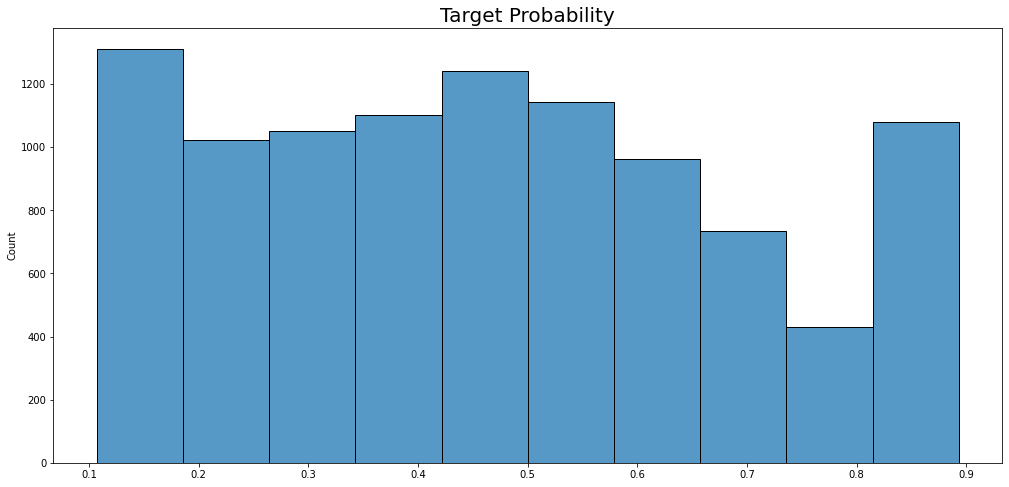

In [ ]:
# check probability dengan Histogram
plt.figure(figsize=(17, 8)) 
sns.histplot(np.mean(predictions_xgb,0),bins=10)
plt.title("Target Probability", size=20)

In [ ]:

#Catboost

cb_params = {"depth": 3, "iterations": 5000, "l2_leaf_reg": 1e-2}

predictions_cb = kfold_model(tournament_data, tournament_data, CatBoostClassifier, cb_params)


Validating on season 2017
	 -> Scored Logloss: 0.4686
	 -> Scored Acc Train: 0.9444
	 -> Scored Acc Validation: 0.7698

Validating on season 2018
	 -> Scored Logloss: 0.4569
	 -> Scored Acc Train: 0.8571
	 -> Scored Acc Validation: 0.7460

Validating on season 2019
	 -> Scored Logloss: 0.3858
	 -> Scored Acc Train: 0.8677
	 -> Scored Acc Validation: 0.7619

Validating on season 2021
	 -> Scored Logloss: 0.4734
	 -> Scored Acc Train: 0.7956
	 -> Scored Acc Validation: 0.7540

Local Cross Validation Score of Logloss Is: 0.446


Text(0.5, 1.0, 'Target Probability')

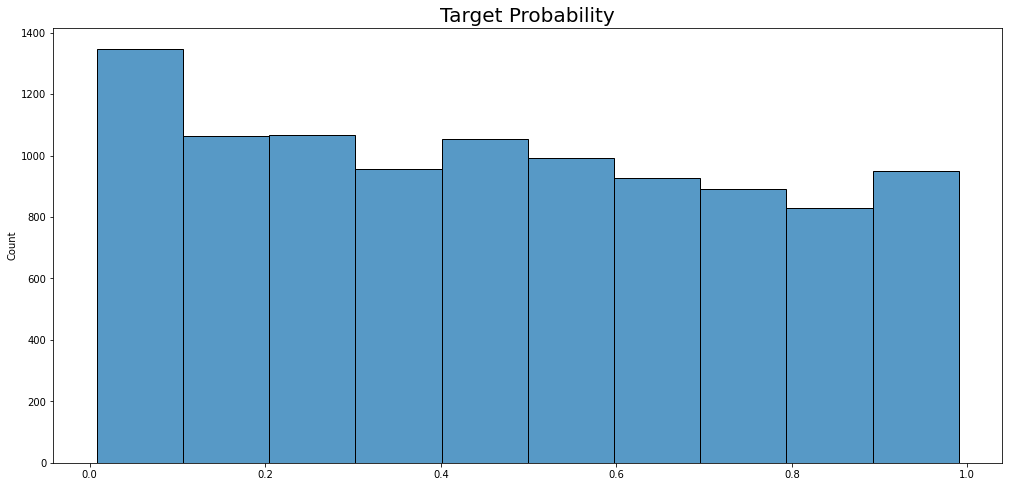

In [ ]:
# check probability dengan Histogram
plt.figure(figsize=(17, 8)) 
sns.histplot(np.mean(predictions_cb,0),bins=10)
plt.title("Target Probability", size=20)

In [ ]:

# LGBM

lgbm_params = {"n_estimators": 10000, "max_depth": 1}

predictions_lgbm = kfold_model(tournament_data, tournament_data, LGBMClassifier, lgbm_params)


Validating on season 2017
	 -> Scored Logloss: 0.4874
	 -> Scored Acc Train: 0.9365
	 -> Scored Acc Validation: 0.7778

Validating on season 2018
	 -> Scored Logloss: 0.4636
	 -> Scored Acc Train: 0.8056
	 -> Scored Acc Validation: 0.7540

Validating on season 2019
	 -> Scored Logloss: 0.3907
	 -> Scored Acc Train: 0.8624
	 -> Scored Acc Validation: 0.7778

Validating on season 2021
	 -> Scored Logloss: 0.4683
	 -> Scored Acc Train: 0.7738
	 -> Scored Acc Validation: 0.7857

Local Cross Validation Score of Logloss Is: 0.453


Text(0.5, 1.0, 'Target Probability')

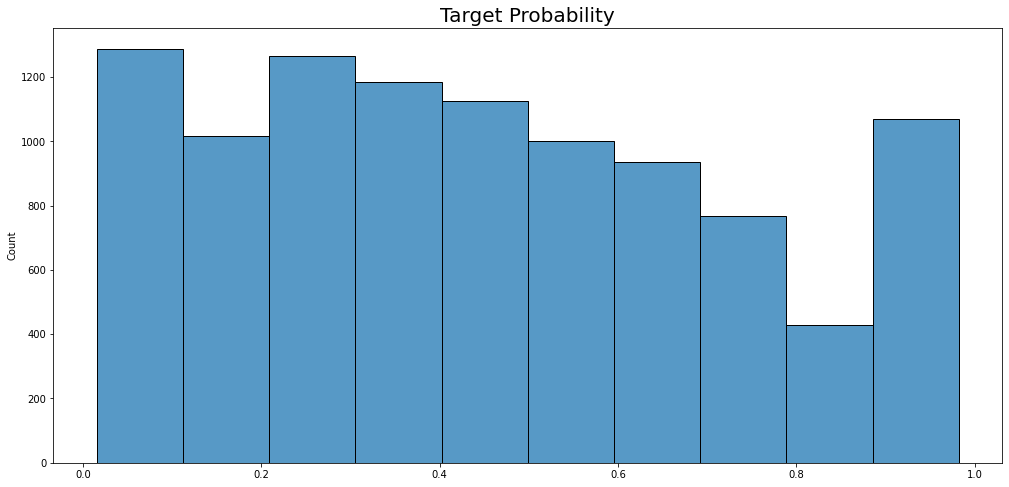

In [ ]:
# check probability dengan Histogram
plt.figure(figsize=(17, 8)) 
sns.histplot(np.mean(predictions_lgbm,0),bins=10)
plt.title("Target Probability", size=20)

In [ ]:
mean_predictions = np.mean(predictions_lgbm,0)

sub = tst_data[['ID', 'Pred']].copy()
sub['Pred'] = mean_predictions

sub.to_csv('submission_3.csv', index = False)

In [ ]:
sub

,ID,Pred
0,2016_3106_3107,0.243888
1,2016_3106_3113,0.058833
2,2016_3106_3119,0.232494
3,2016_3106_3120,0.248653
4,2016_3106_3124,0.020944
...,...,...
10075,2021_3450_3460,0.773033
10076,2021_3450_3461,0.663698
10077,2021_3452_3460,0.949018
10078,2021_3452_3461,0.901436
